In [1]:
import requests as r
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from dotenv import load_dotenv
from os import environ
from tools import *

load_dotenv()

In [3]:
g = Github(environ['user'],environ['token'])

In [11]:
commits = flatten([g.get_commits('mozilla/DeepSpeech',{'page':x+1,'per_page':100}).json() for x in range(35)])

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
len(commits)

3466

In [21]:
from functools import reduce

In [27]:
pytorch = reduce(lambda a,b: a + b, [g.repo_search('pytorch+language:python+created:2019',{'page':x+1,'per_page':100}).json()['items'] for x in range(10)])

In [32]:
pytorch2 = reduce(lambda a,b: a + b, [g.repo_search('pytorch+language:python+created:2020',{'page':x+1,'per_page':100}).json()['items'] for x in range(10)])

In [33]:
sorted([(item['full_name'], item['stargazers_count']) for item in pytorch2], key=lambda x:x[-1],reverse=True)

[('ultralytics/yolov5', 21175),
 ('JaidedAI/EasyOCR', 13575),
 ('microsoft/Bringing-Old-Photos-Back-to-Life', 9820),
 ('lucidrains/vit-pytorch', 8227),
 ('microsoft/DeepSpeed', 6106),
 ('geohot/tinygrad', 5144),
 ('openai/jukebox', 4911),
 ('Jack-Cherish/PythonPark', 4796),
 ('Tianxiaomo/pytorch-YOLOv4', 3742),
 ('speechbrain/speechbrain', 3608),
 ('NVlabs/imaginaire', 3038),
 ('zhanghang1989/ResNeSt', 2956),
 ('facebookresearch/moco', 2951),
 ('lyhue1991/eat_pytorch_in_20_days', 2852),
 ('aladdinpersson/Machine-Learning-Collection', 2810),
 ('AntixK/PyTorch-VAE', 2808),
 ('DLR-RM/stable-baselines3', 2733),
 ('microsoft/hummingbird', 2718),
 ('lucidrains/stylegan2-pytorch', 2703),
 ('POSTECH-CVLab/PyTorch-StudioGAN', 2371),
 ('jettify/pytorch-optimizer', 2281),
 ('open-mmlab/OpenPCDet', 2279),
 ('huggingface/accelerate', 2092),
 ('zhouhaoyi/Informer2020', 2057),
 ('mikel-brostrom/Yolov5_DeepSort_Pytorch', 2003),
 ('cleardusk/3DDFA_V2', 1999),
 ('open-mmlab/mmdetection3d', 1975),
 ('jiu

In [31]:
sorted([(item['full_name'], item['stargazers_count']) for item in pytorch], key=lambda x:x[-1],reverse=True)

[('CorentinJ/Real-Time-Voice-Cloning', 32773),
 ('PyTorchLightning/pytorch-lightning', 16952),
 ('rwightman/pytorch-image-models', 15820),
 ('lukemelas/EfficientNet-PyTorch', 6725),
 ('jackzhenguo/python-small-examples', 6655),
 ('ymcui/Chinese-BERT-wwm', 6454),
 ('WZMIAOMIAO/deep-learning-for-image-processing', 6187),
 ('facebookresearch/pytorch3d', 5547),
 ('qubvel/segmentation_models.pytorch', 4730),
 ('activeloopai/Hub', 4194),
 ('KevinMusgrave/pytorch-metric-learning', 4027),
 ('brightmart/albert_zh', 3512),
 ('foolwood/SiamMask', 3217),
 ('649453932/Chinese-Text-Classification-Pytorch', 3194),
 ('INTERMT/Awesome-PyTorch-Chinese', 3105),
 ('NVIDIA-AI-IOT/torch2trt', 3053),
 ('bytedance/byteps', 3045),
 ('tamarott/SinGAN', 3003),
 ('pytorch/captum', 2884),
 ('tianzhi0549/FCOS', 2853),
 ('NVIDIAGameWorks/kaolin', 2825),
 ('ZhaoJ9014/face.evoLVe', 2741),
 ('clovaai/stargan-v2', 2736),
 ('open-mmlab/mmediting', 2679),
 ('Project-MONAI/MONAI', 2676),
 ('timesler/facenet-pytorch', 2624)

In [13]:
corpus = " ".join(comm['commit']['message'] for comm in commits)

NameError: name 'commits' is not defined

In [ ]:
wc = WordCloud(background_color='white',max_font_size=50, width = 1200, height = 400).generate(corpus)


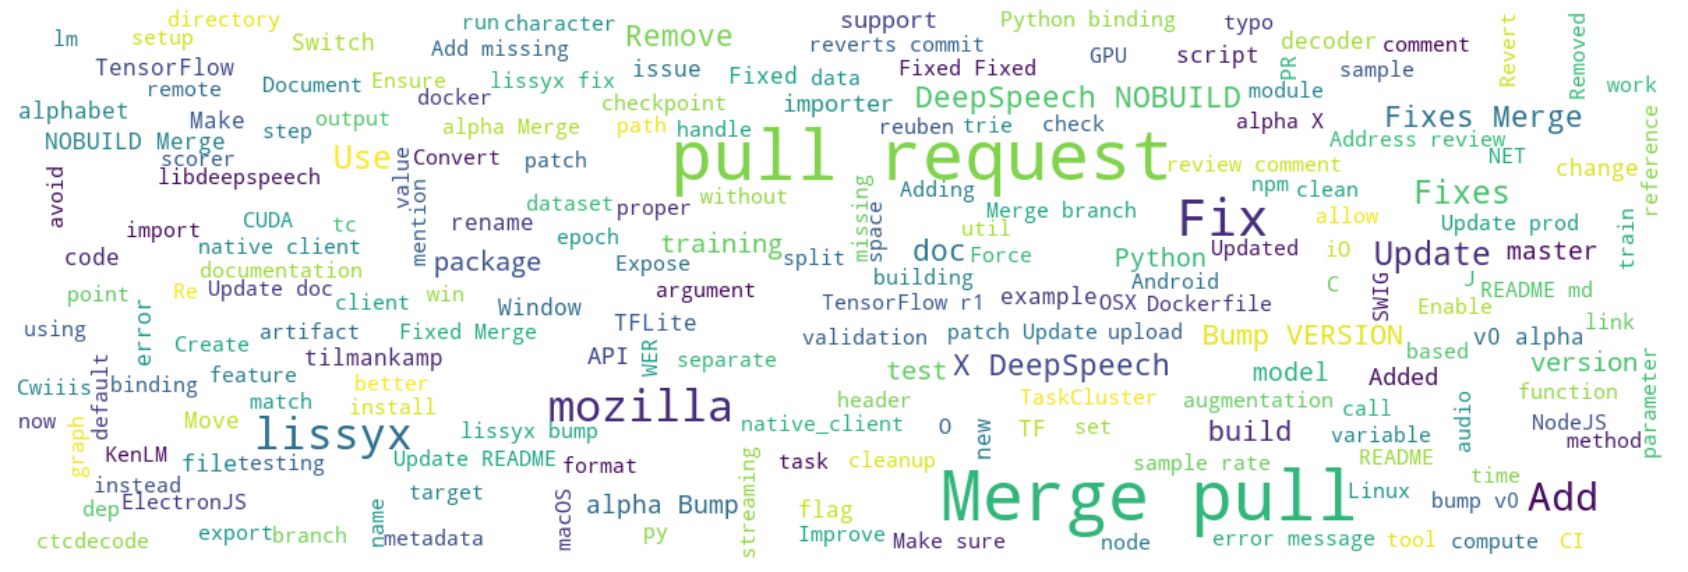

In [ ]:
fig = plt.figure(figsize=(30,30))
fig = plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
commits[0]

{'sha': 'aa1d28530d531d0d92289bf5f11a49fe516fdc86',
 'node_id': 'C_kwDOA5e0KNoAKGFhMWQyODUzMGQ1MzFkMGQ5MjI4OWJmNWYxMWE0OWZlNTE2ZmRjODY',
 'commit': {'author': {'name': 'lissyx',
   'email': '1645737+lissyx@users.noreply.github.com',
   'date': '2021-11-17T17:52:52Z'},
  'committer': {'name': 'GitHub',
   'email': 'noreply@github.com',
   'date': '2021-11-17T17:52:52Z'},
  'message': 'Merge pull request #3703 from danieltinazzi/master\n\nFix M-AILABS broken link',
  'tree': {'sha': '48d0cdaa6dd738ee806d50c2694a364be515c8a0',
   'url': 'https://api.github.com/repos/mozilla/DeepSpeech/git/trees/48d0cdaa6dd738ee806d50c2694a364be515c8a0'},
  'url': 'https://api.github.com/repos/mozilla/DeepSpeech/git/commits/aa1d28530d531d0d92289bf5f11a49fe516fdc86',
  'comment_count': 0,
  'verification': {'verified': True,
   'reason': 'valid',
   'signature': '-----BEGIN PGP SIGNATURE-----\n\nwsBcBAABCAAQBQJhlUF0CRBK7hj4Ov3rIwAAkaoIAAQPGx3X/gKvMQHEnRZE0zA2\n7OPztiGl0xn/kThCRzhjSs/tRIuPik/Lv/H/dOb0HkxO8dI

In [ ]:
dp = flatten([g.get_commits('deepmipt/DeepPavlov',{'page':x+1,'per_page':100}).json() for x in range(27)])

In [ ]:
import re 

In [ ]:
[dp_corpus[i.start()-30:i.start()+30] for i in re.finditer('softmax',dp_corpus)]

['tokens can be given\r\n\r\n* fix: softmax in functional\r\n\r\n* fix',
 'vation\r\n\r\n* fix: probas after softmax in ranker\r\n\r\n* fix: pr',
 'ranker\r\n\r\n* fix: probas after softmax in ner\r\n\r\n* fix: bert ',
 '\n* fix: expand dims\r\n\r\n* fix: softmax mask for logits\r\n\r\n* f',
 'del uses fit()\r\n\r\n* feat: use softmax_cross_entropy_with_log',
 'ferModel\r\n\r\n* fix: sigmoid -> softmax output\r\n\r\n* docs: upd ',
 'del uses fit()\r\n\r\n* feat: use softmax_cross_entropy_with_log',
 's_layers\r\n\r\n* fix: del custom softmax\r\n\r\n* fix: del custom s',
 ' softmax\r\n\r\n* fix: del custom softmax\r\n\r\n* merge dev fix: co',
 ' and general with constrained softmax attention.\r\n\r\n* update',
 'x (attenion): Fix bug of used softmax of gen_attention.\r\n\r\n*',
 ' and general with constrained softmax attention.\r\n\r\n* update',
 'x (attenion): Fix bug of used softmax of gen_attention.\r\n\r\n*']

In [ ]:
dp_corpus = " ".join(comm['commit']['message'] for comm in dp)

In [ ]:
dp_corpus.find("softmax")

42339

In [ ]:
dp_wc = WordCloud(background_color='white',max_font_size=50, width = 1200, height = 400).generate(dp_corpus)

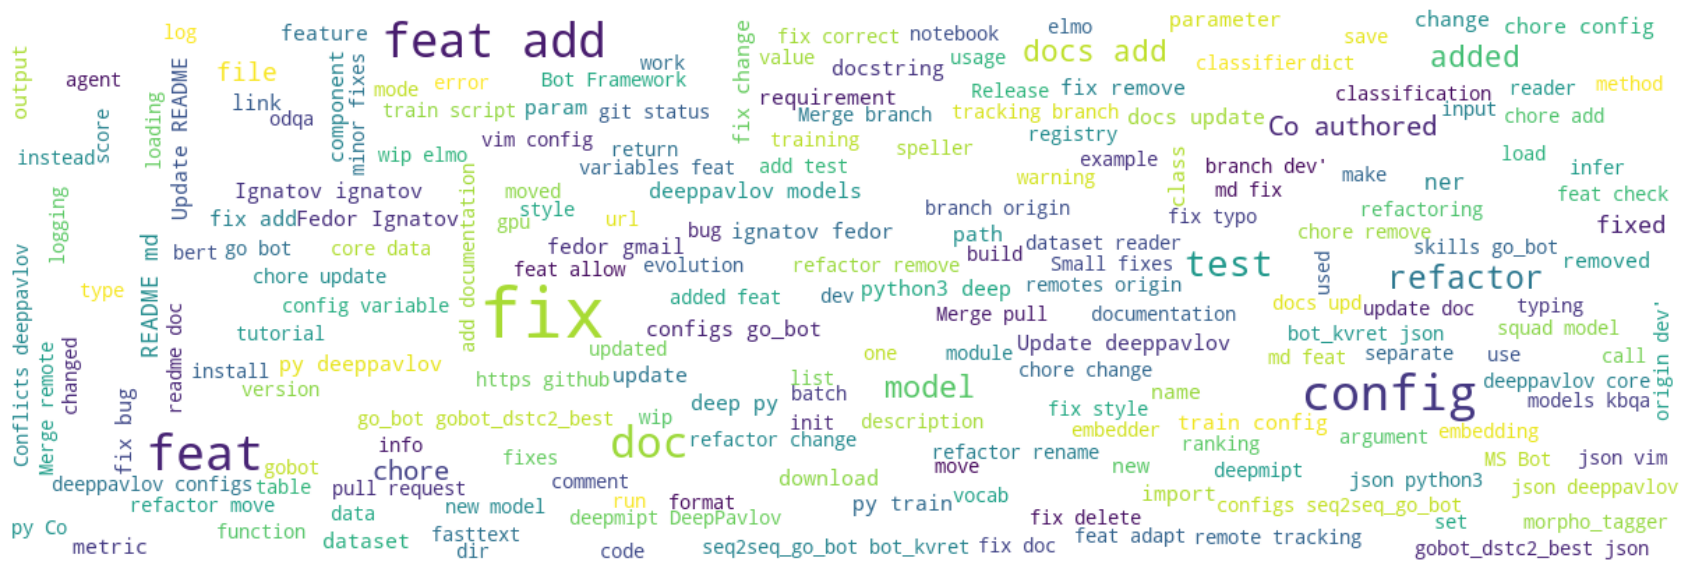

In [ ]:
fig = plt.figure(figsize=(30,30))
fig = plt.imshow(dp_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
import requests

In [38]:
diff = requests.get('https://github.com/speechbrain/speechbrain/commit/e14d2c15874a22df018edf441af62b105b33ed39.diff').text

In [39]:
diff.split("\n")

['diff --git a/speechbrain/core.py b/speechbrain/core.py',
 'index 751d9851b..398b12a1e 100644',
 '--- a/speechbrain/core.py',
 '+++ b/speechbrain/core.py',
 '@@ -256,6 +256,16 @@ def parse_arguments(arg_list=None):',
 '         help="Amount of time between saving intra-epoch checkpoints "',
 '         "in minutes. If non-positive, intra-epoch checkpoints are not saved.",',
 '     )',
 '+    parser.add_argument(',
 '+        "--grad_accumulation_factor",',
 '+        type=int,',
 '+        help="Number of batches to accumulate gradients before optimizer step",',
 '+    )',
 '+    parser.add_argument(',
 '+        "--optimizer_step_limit",',
 '+        type=int,',
 '+        help="Number of optimizer steps to run. If not passed, all epochs are run.",',
 '+    )',
 ' ',
 '     # Accept extra args to override yaml',
 '     run_opts, overrides = parser.parse_known_args(arg_list)',
 '@@ -435,6 +445,8 @@ def __init__(  # noqa: C901',
 '             "nonfinite_patience": 3,',
 '             "